In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dfBase = pd.read_csv('/Users/nezahatsonmez/Documents/egitim/meetup/automobile_dataset'
                     , names=['symboling','normalized-losses','make','fuel-type'
                              ,'aspiration','num-of-doors','body-style','drive-wheels'
                              ,'engine-location','wheel-base','length','width','height'
                              ,'curb-weight','engine-type','num-of-cylinders','engine-size'
                              ,'fuel-system','bore','stroke','compression-ratio','horsepower'
                              ,'peak-rpm','city-mpg','highway-mpg','price'])

In [3]:
dfBase.head(40)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


In [4]:
dfBase.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [5]:
df = dfBase.apply(lambda x: x.replace('?',np.NaN))
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
from sklearn.preprocessing import Imputer
df = df.replace('?', 'NaN')
imp = Imputer(missing_values='NaN', strategy='mean' )
df[['normalized-losses','bore','stroke','horsepower','peak-rpm','price']] = imp.fit_transform(df[['normalized-losses',
                                                                                                      'bore','stroke','horsepower','peak-rpm','price']])
df.head() 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [7]:
df[df.isnull().any(axis=1)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,122.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [8]:
df["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [9]:
#En çok olan değer ile dolduralım
df['num-of-doors'] = df['num-of-doors'].fillna('four')
#df['num-of-cylinders'] = df['num-of-cylinders'].fillna('four')

In [10]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'], dtype=object)

In [11]:
df['num-of-doors']=df['num-of-doors'].map({'two':2,'four':4})
df['num-of-cylinders']=df['num-of-cylinders'].map({'two':2,'three':3,'four':4,'five':5,'six':6, 'eight':8,'twelve':12})
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


##### En çok hangi marka araba satılıyor?

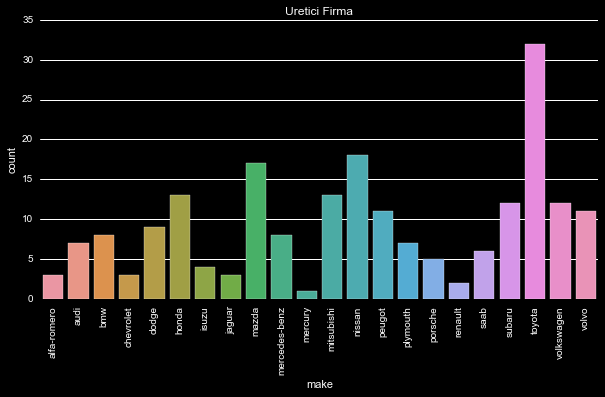

In [13]:
plt.figure(figsize=(10, 5))
#plt.style.use('dark_background')
sns.countplot(x='make', data=df)
plt.xticks(rotation='vertical')
plt.title('Uretici Firma')
plt.show()


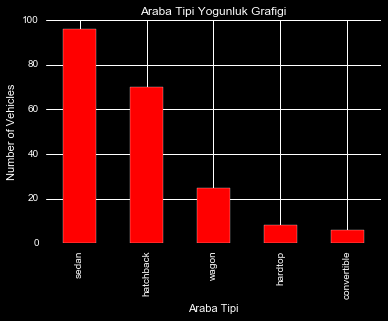

In [14]:
df['body-style'].value_counts().plot(kind='bar',color='r')
#plt.style.use('dark_background')
plt.title("Araba Tipi Yogunluk Grafigi")
plt.ylabel('Number of Vehicles')
plt.xlabel('Araba Tipi');

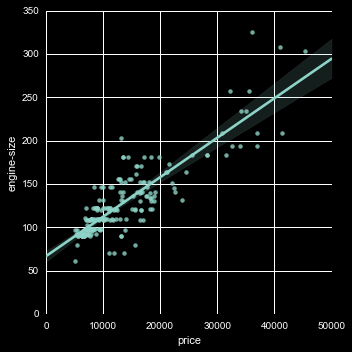

In [15]:
sns.lmplot('price',"engine-size",data=df)

1.Curb weight: Is the total weight of the vehicle without the weight of the passenger.It includes weight of coolants,oil and fuel.Defination of curb weight may vary based on the standard adopted by a country.In this data set the curb weight of most cars is in the range 2000-3100 lbs.

2.Engine Size: It is the amount of air that can be sucked in by the engine.Generally it is measured in litres.For example an average car in India would have an engine capacity in the rane of 1-1.5 liter.

3.Highway-mpg: It is the kilometer or miles that a car can travel with one liter of fuel on the highway.In this data set it seems to me that it is the amount of miles the car travels with one gallon of fuel.

4.Horse Power: It is the measure of the power of the engine.One horse power is equivalent of the power of one horse.So 100 hp engine woulf be equivalent to the power of 100 horses.Now a days engine power is measure in Kilowatt which is the unit of power in SI System.

5.Peak rpm: RPM (Reolutions per minute) is the measure of the speed of roation of Engine per minute.The peak rpm of the vehicles are generally in the range 5000-6500 rpm.

6.Price: In US today the median price of the vehicle is around 35000$.This is a old data so it shows very low median car price.

## MODEL

In [15]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors           int64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders       int64
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [16]:
for col in ['make','fuel-type','aspiration','body-style',
'drive-wheels','engine-location','engine-type','fuel-system']:
    df[col] = df[col].astype('category')


In [17]:
df.dtypes

symboling               int64
normalized-losses     float64
make                 category
fuel-type            category
aspiration           category
num-of-doors            int64
body-style           category
drive-wheels         category
engine-location      category
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type          category
num-of-cylinders        int64
engine-size             int64
fuel-system          category
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
dtype: object

In [18]:
cat_df = df.select_dtypes(include=['category']).copy()
num_df= df.select_dtypes(exclude=['category']).copy()

In [19]:
cat_df.head()

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,fuel-system
0,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
1,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romero,gas,std,hatchback,rwd,front,ohcv,mpfi
3,audi,gas,std,sedan,fwd,front,ohc,mpfi
4,audi,gas,std,sedan,4wd,front,ohc,mpfi


In [20]:
num_df.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [21]:
df_dum = pd.get_dummies(cat_df, columns= cat_df.columns)

In [22]:
num_df[num_df.isnull().any(axis=1)]

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [23]:
num_df.corr()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.663595,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.130083,-0.008689,-0.178515,0.071389,0.273679,-0.035823,0.034606,-0.082201
normalized-losses,0.465190,1.000000,-0.357192,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.108081,0.110997,-0.029266,0.054929,-0.114525,0.203434,0.237748,-0.218749,-0.178221,0.133999
num-of-doors,-0.663595,-0.357192,1.000000,0.439635,0.385675,0.197735,0.540286,0.190720,-0.019503,0.013919,0.108510,-0.006892,0.171797,-0.128184,-0.240298,-0.014271,-0.037452,0.041945
wheel-base,-0.531954,-0.056518,0.439635,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488760,0.160944,0.249786,0.351957,-0.360704,-0.470414,-0.544082,0.583168
length,-0.357612,0.019209,0.385675,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606462,0.129522,0.158414,0.554434,-0.287031,-0.670909,-0.704662,0.682986
width,-0.232919,0.084195,0.197735,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559152,0.182939,0.181129,0.642195,-0.219859,-0.642704,-0.677218,0.728699
height,-0.541038,-0.370706,0.540286,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171101,-0.055351,0.261214,-0.110137,-0.320602,-0.048640,-0.107358,0.134388
curb-weight,-0.227691,0.097785,0.190720,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648485,0.168783,0.151362,0.750968,-0.266283,-0.757414,-0.797465,0.820825
num-of-cylinders,-0.113129,0.108081,-0.019503,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231439,0.008151,-0.020002,0.691208,-0.124358,-0.445837,-0.466666,0.687770
engine-size,-0.105790,0.110997,0.013919,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583798,0.203094,0.028971,0.810713,-0.244599,-0.653658,-0.677470,0.861752


In [24]:
from sklearn.preprocessing import Normalizer
numerical = num_df.values
normalizer = Normalizer().fit(numerical)
norm = normalizer.transform(numerical)
df_normalized = pd.DataFrame(norm)
df_normalized.columns = list(num_df.columns.values)
df_normalized.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.000205,0.008346,0.000137,0.006061,0.011547,0.004385,0.003338,0.174302,0.000274,0.008893,0.000237,0.000183,0.000616,0.007593,0.342036,0.001437,0.001847,0.923156
1,0.000172,0.006999,0.000115,0.005083,0.009684,0.003677,0.002800,0.146179,0.000229,0.007458,0.000199,0.000154,0.000516,0.006368,0.286850,0.001205,0.001549,0.946604
2,0.000057,0.006982,0.000114,0.005408,0.009798,0.003749,0.002999,0.161558,0.000343,0.008699,0.000153,0.000199,0.000515,0.008813,0.286146,0.001087,0.001488,0.944280
3,0.000132,0.010804,0.000264,0.006575,0.011634,0.004361,0.003577,0.153959,0.000264,0.007181,0.000210,0.000224,0.000659,0.006720,0.362334,0.001581,0.001976,0.919010
4,0.000108,0.008857,0.000216,0.005368,0.009538,0.003586,0.002933,0.152518,0.000270,0.007345,0.000172,0.000184,0.000432,0.006211,0.297043,0.000972,0.001188,0.942438


In [25]:
dfMerged = pd.concat([df_dum,df_normalized,df_dum], axis=1)
dfMerged.head()

,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.000205,0.008346,0.000137,0.006061,0.011547,0.004385,0.003338,0.174302,0.000274,0.008893,0.000237,0.000183,0.000616,0.007593,0.342036,0.001437,0.001847,0.923156,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.000172,0.006999,0.000115,0.005083,0.009684,0.003677,0.002800,0.146179,0.000229,0.007458,0.000199,0.000154,0.000516,0.006368,0.286850,0.001205,0.001549,0.946604,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.000057,0.006982,0.000114,0.005408,0.009798,0.003749,0.002999,0.161558,0.000343,0.008699,0.000153,0.000199,0.000515,0.008813,0.286146,0.001087,0.001488,0.944280,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.000132,0.010804,0.000264,0.006575,0.011634,0.004361,0.003577,0.153959,0.000264,0.007181,0.000210,0.000224,0.000659,0.006720,0.362334,0.001581,0.001976,0.919010,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.000108,0.008857,0.000216,0.005368,0.009538,0.003586,0.002933,0.152518,0.000270,0.007345,0.000172,0.000184,0.000432,0.006211,0.297043,0.000972,0.001188,0.942438,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [26]:
prediction = dfMerged.iloc[204:205]
data = dfMerged.iloc[0:205]

In [27]:
from sklearn import preprocessing
from sklearn.model_selection import KFold

X = data.drop(['price'],axis=1).values
Y = data['price'].values

Xpred = prediction.drop(['price'],axis=1).values
Ypred = prediction['price'].values

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y)

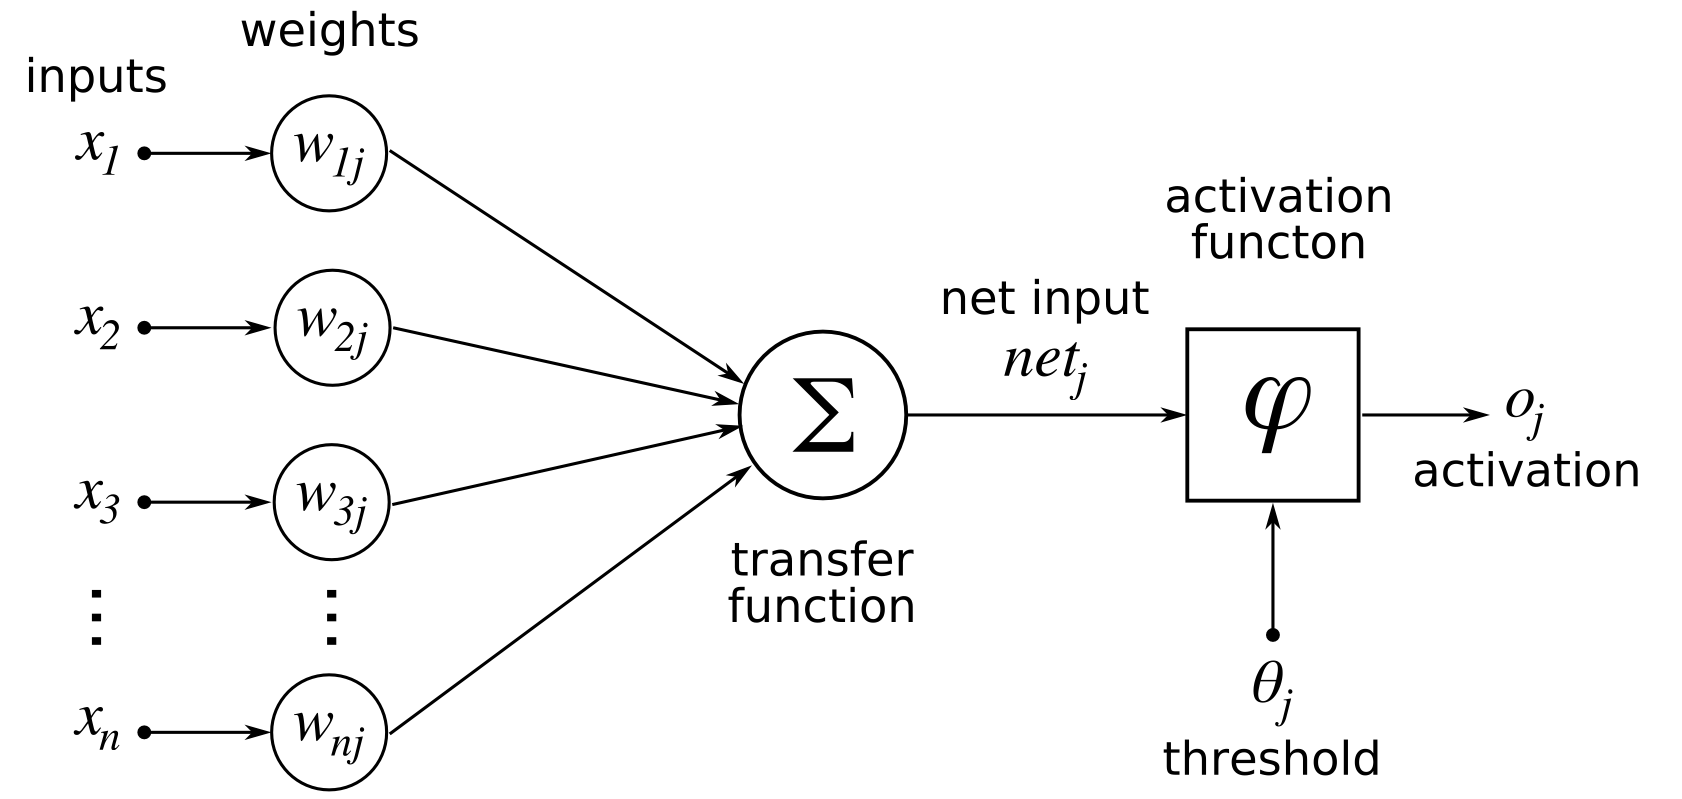

In [46]:
from IPython.display import Image
Image(filename='/Users/nezahatsonmez/Documents/egitim/meetup/nn2.png')

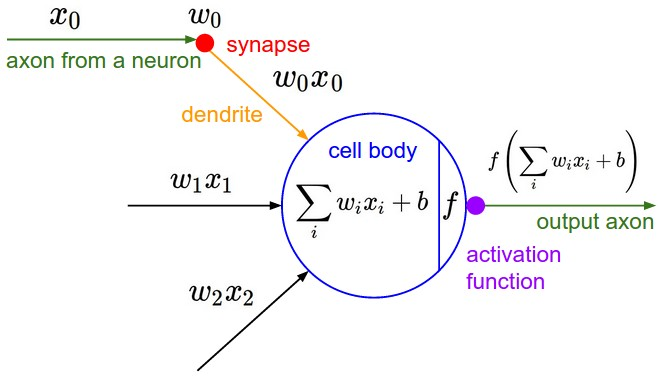

In [50]:
from IPython.display import Image
Image(filename='/Users/nezahatsonmez/Documents/egitim/meetup/neuron_model.jpg')

In [31]:
model = Sequential()
model.add(Dense(X.shape[1], input_dim=X.shape[1], init='normal', activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 119)           14280       dense_input_1[0][0]              
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 40)            4800        dense_1[0][0]                    
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 1)             41          dense_2[0][0]                    
Total params: 19,121
Trainable params: 19,121
Non-trainable params: 0
____________________________________________________________________________________________________


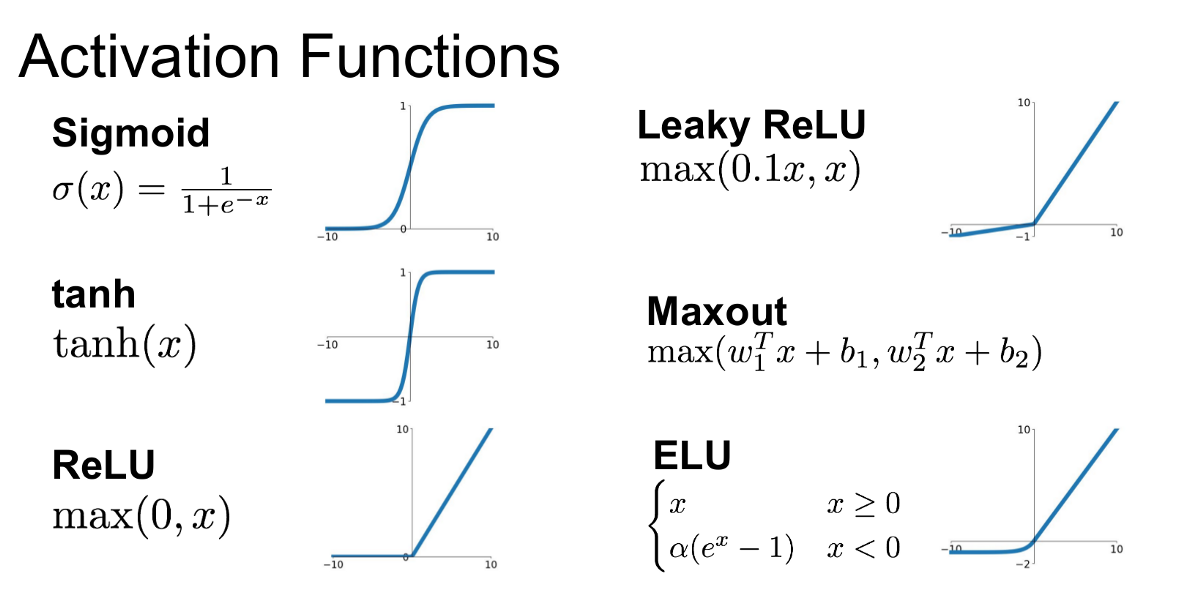

In [53]:
from IPython.display import Image
Image(filename='/Users/nezahatsonmez/Documents/egitim/meetup/activations.png')

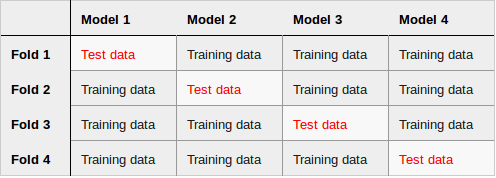

In [55]:
from IPython.display import Image
Image(filename='/Users/nezahatsonmez/Documents/egitim/meetup/k_fold.png')

In [32]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [34]:
history = model.fit(X_train, y_train, nb_epoch=100, batch_size=5,  verbose=1, validation_split=0.2)

Train on 122 samples, validate on 31 samples
Epoch 1/100
122/122 [==============================] - 0s - loss: 0.1886 - mean_squared_error: 0.1886 - mean_absolute_error: 0.3379 - val_loss: 0.0248 - val_mean_squared_error: 0.0248 - val_mean_absolute_error: 0.1302
Epoch 2/100
122/122 [==============================] - 0s - loss: 0.0115 - mean_squared_error: 0.0115 - mean_absolute_error: 0.0878 - val_loss: 0.0120 - val_mean_squared_error: 0.0120 - val_mean_absolute_error: 0.0922
Epoch 3/100
122/122 [==============================] - 0s - loss: 0.0054 - mean_squared_error: 0.0054 - mean_absolute_error: 0.0558 - val_loss: 0.0059 - val_mean_squared_error: 0.0059 - val_mean_absolute_error: 0.0620
Epoch 4/100
122/122 [==============================] - 0s - loss: 0.0027 - mean_squared_error: 0.0027 - mean_absolute_error: 0.0387 - val_loss: 0.0039 - val_mean_squared_error: 0.0039 - val_mean_absolute_error: 0.0484
Epoch 5/100
122/122 [==============================] - 0s - loss: 0.0017 - mean_squ

122/122 [==============================] - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0277 - val_loss: 0.0021 - val_mean_squared_error: 0.0021 - val_mean_absolute_error: 0.0339
Epoch 38/100
122/122 [==============================] - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0295 - val_loss: 0.0030 - val_mean_squared_error: 0.0030 - val_mean_absolute_error: 0.0410
Epoch 39/100
122/122 [==============================] - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0266 - val_loss: 0.0021 - val_mean_squared_error: 0.0021 - val_mean_absolute_error: 0.0369
Epoch 40/100
122/122 [==============================] - 0s - loss: 0.0010 - mean_squared_error: 0.0010 - mean_absolute_error: 0.0260 - val_loss: 0.0024 - val_mean_squared_error: 0.0024 - val_mean_absolute_error: 0.0369
Epoch 41/100
122/122 [==============================] - 0s - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0247 - va

122/122 [==============================] - 0s - loss: 5.2030e-04 - mean_squared_error: 5.2030e-04 - mean_absolute_error: 0.0176 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0254
Epoch 74/100
122/122 [==============================] - 0s - loss: 5.9493e-04 - mean_squared_error: 5.9493e-04 - mean_absolute_error: 0.0181 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0265
Epoch 75/100
122/122 [==============================] - 0s - loss: 6.0830e-04 - mean_squared_error: 6.0830e-04 - mean_absolute_error: 0.0184 - val_loss: 0.0015 - val_mean_squared_error: 0.0015 - val_mean_absolute_error: 0.0267
Epoch 76/100
122/122 [==============================] - 0s - loss: 6.0733e-04 - mean_squared_error: 6.0733e-04 - mean_absolute_error: 0.0196 - val_loss: 0.0020 - val_mean_squared_error: 0.0020 - val_mean_absolute_error: 0.0363
Epoch 77/100
122/122 [==============================] - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - 

['loss', 'mean_absolute_error', 'val_mean_squared_error', 'val_mean_absolute_error', 'mean_squared_error', 'val_loss']


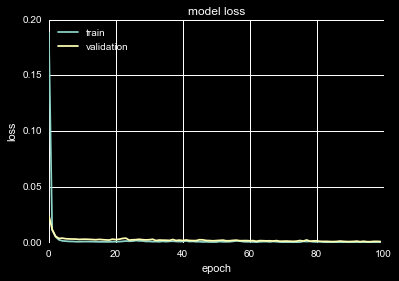

In [35]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

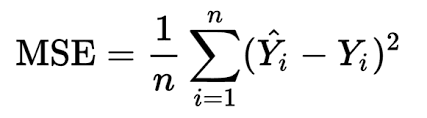

In [56]:
from IPython.display import Image
Image(filename='/Users/nezahatsonmez/Documents/egitim/meetup/mse.png')

In [36]:
ynew = model.predict(Xpred)
print("Predicted=%s" % ( ynew[0]))

Predicted=[ 0.96707112]


In [37]:
Ypred

array([ 0.96427323])

In [41]:
 4.6453e-04

0.00046453